In [102]:
import numpy as np
import pandas as pd

In [103]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
dataset = data.frame
targets = data.target_names
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [104]:
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    np.array(dataset[dataset.columns.drop(['target'])]),
    np.array(dataset['target']),
    test_size = 0.2,
    shuffle=True
)

In [106]:
from src.layers import BNormalizer

normalizer = BNormalizer(4)
normalizer.fit(x_train)


x_train = normalizer.predict(x_train)
x_test = normalizer.predict(x_test)

In [107]:
def one_hot_encode(labels, num_classes):
    one_hot_targets = np.zeros((len(labels), num_classes), dtype=int)
    one_hot_targets[np.arange(len(labels)), labels] = 1
    return one_hot_targets

In [108]:
y_train, y_test = one_hot_encode(y_train, len(targets)), one_hot_encode(y_test, len(targets))

print(y_train.shape, y_test.shape)

(120, 3) (30, 3)


In [109]:
from src.model import BModel
from src.layers import BDenseLayer, BFuncLayer
from src.binary_funcs import SecondDegreeZhegalkinPolynomial
from src.loss_function import zero_one

model_perceptron = BModel([
    BDenseLayer(x_train.shape[1], 64),
    BDenseLayer(64, 128),
    BDenseLayer(128, 128),
    BDenseLayer(128, 128),
    BDenseLayer(128, 3)
], zero_one)

model_zhegalkin = BModel([
    BFuncLayer(x_train.shape[1], 12, SecondDegreeZhegalkinPolynomial),
    BFuncLayer(12, 8, SecondDegreeZhegalkinPolynomial),
    BFuncLayer(8, 3, SecondDegreeZhegalkinPolynomial),
], zero_one)

EPOCHS = 1000

In [110]:
x_train.shape

(120, 16)

Binary annealing dense net

In [111]:
#hist_perceptron = model_perceptron.fit(x_train, y_train, batch_size=16, meta_parameter_size=16, epochs=EPOCHS)

In [112]:
import matplotlib.pyplot as plt

#plt.plot(hist_perceptron['loss'])

In [113]:
#print(min(hist_perceptron['loss']), hist_perceptron['loss'][-1])
#print(zero_one(model_perceptron.predict(x_test), y_test))

Binary zhegalkin annealing net

In [114]:
hist_zhegalkin = model_zhegalkin.fit(x_train, y_train, batch_size=120, meta_parameter_size=16, epochs=EPOCHS)

epoch : 1 loss : inf: 1it [00:00,  9.80it/s]
epoch : 2 loss : 0.4388888888888889: 1it [00:00,  9.88it/s]
epoch : 3 loss : 0.2611111111111111: 1it [00:00,  9.65it/s]
epoch : 4 loss : 0.5166666666666667: 1it [00:00, 10.69it/s]
epoch : 5 loss : 0.3972222222222222: 1it [00:00, 10.89it/s]
epoch : 6 loss : 0.45: 1it [00:00, 10.68it/s]
epoch : 7 loss : 0.30277777777777776: 1it [00:00, 10.85it/s]
epoch : 8 loss : 0.30277777777777776: 1it [00:00, 10.79it/s]
epoch : 9 loss : 0.30277777777777776: 1it [00:00, 10.92it/s]
epoch : 10 loss : 0.30277777777777776: 1it [00:00, 10.81it/s]
epoch : 11 loss : 0.2916666666666667: 1it [00:00, 10.03it/s]
epoch : 12 loss : 0.2916666666666667: 1it [00:00, 10.52it/s]
epoch : 13 loss : 0.2916666666666667: 1it [00:00, 10.50it/s]
epoch : 14 loss : 0.2916666666666667: 1it [00:00, 10.79it/s]
epoch : 15 loss : 0.2916666666666667: 1it [00:00, 10.66it/s]
epoch : 16 loss : 0.2916666666666667: 1it [00:00, 10.65it/s]
epoch : 17 loss : 0.2916666666666667: 1it [00:00, 10.76it/

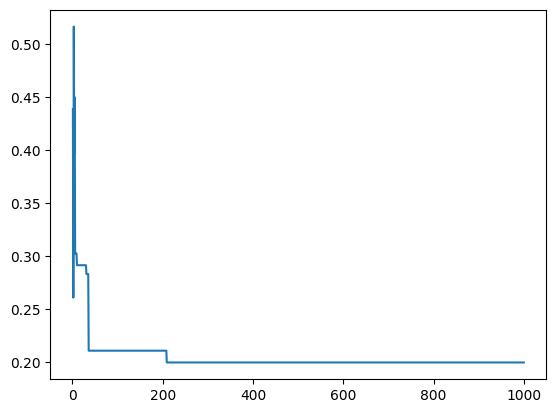

In [115]:
plt.plot(hist_zhegalkin['loss'])

In [116]:
print(min(hist_zhegalkin['loss']), hist_zhegalkin['loss'][-1])
print(zero_one(model_zhegalkin.predict(x_test), y_test))

0.2 0.2
0.26666666666666666
